### **The GitHub Branching process**

**Open your terminal**
file -> new terminal 

**Ensure you are on main and up to date**
git checkout main
git pull origin main

**Create and switch to new branch**
git checkout -b your-name/feature-description

**Add your changes (specific)**
git add notebooks/task_1.ipynb

**Or add all changes**
git add .

**Commit with clear message**
git commit -m "Complete data cleaning for task 1"
git push origin dhruv/task1-analysis

**Go to GitHub and open a Pull Request**



**1.1. Roadmap** 
1. getting our data
2. look at basic info - shape, info, missingness
3. Figure out target variable categories 
4. sample - stratify to mainatain balance between classes
5. save sampled data to new csv 
6. EDA and visualisations 
7. encode the target variable (there are 8 variable types, maybe label encode)



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#import plotly.express as px 
#import plotly.graph_objects as go

#import missingno as msno 


In [4]:
df = pd.read_csv("../data/raw/data-1.csv")
df.head()

,land_type,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,...,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218,rgb_hex,overlay_hex
0,valley floor / meadow,0,0,0.0174,0.0131,0.0108,0.0133,0.0158,0.0144,0.0151,...,0.0237,0.0231,0.0224,0.0246,0.0255,0.0174,0.0234,0.0147,#030B05,#25C77140
1,valley floor / meadow,1,0,0.0180,0.0124,0.0116,0.0143,0.0154,0.0136,0.0151,...,0.0289,0.0275,0.0288,0.0293,0.0286,0.0211,0.0229,0.0176,#040A09,#25C77140
2,valley floor / meadow,2,0,0.0151,0.0150,0.0113,0.0158,0.0167,0.0158,0.0163,...,0.0358,0.0319,0.0355,0.0274,0.0303,0.0232,0.0282,0.0181,#08110B,#25C77140
3,valley floor / meadow,3,0,0.0172,0.0149,0.0095,0.0156,0.0154,0.0169,0.0176,...,0.0310,0.0294,0.0307,0.0238,0.0304,0.0232,0.0247,0.0087,#0C160C,#25C77140
4,valley floor / meadow,4,0,0.0184,0.0149,0.0143,0.0189,0.0174,0.0174,0.0182,...,0.0428,0.0372,0.0407,0.0344,0.0415,0.0287,0.0317,0.0176,#0E180C,#25C77140


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215604 entries, 0 to 215603
Columns: 223 entries, land_type to overlay_hex
dtypes: float64(218), int64(2), object(3)
memory usage: 366.8+ MB


In [6]:
df.describe()

,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,...,Band_209,Band_210,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218
count,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,...,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000
mean,176.934871,303.167789,0.095601,0.094335,0.095621,0.099081,0.100492,0.101252,0.102764,0.104476,...,0.110929,0.108438,0.108563,0.105381,0.105773,0.100424,0.099806,0.095834,0.092850,0.086839
std,102.491875,175.323061,0.164291,0.163833,0.165067,0.166807,0.167414,0.167216,0.167939,0.168141,...,0.059208,0.059431,0.059182,0.059277,0.058764,0.057765,0.056946,0.057251,0.054999,0.056024
min,0.000000,0.000000,-0.012000,-0.012600,-0.011900,-0.008800,-0.009300,-0.009000,-0.007700,-0.007500,...,0.007400,0.005700,0.006900,0.003600,0.006800,0.002400,0.004100,0.001100,0.000100,-0.010000
25%,88.000000,151.000000,0.022600,0.020600,0.020000,0.022900,0.023400,0.023800,0.024500,0.025500,...,0.058600,0.055700,0.056000,0.052500,0.053500,0.048900,0.048900,0.044400,0.043600,0.036300
50%,177.000000,303.000000,0.037800,0.036800,0.037700,0.040600,0.041600,0.042200,0.043400,0.045300,...,0.101100,0.098200,0.098200,0.094900,0.095000,0.089600,0.089000,0.085100,0.082300,0.076000
75%,266.000000,455.000000,0.078000,0.078000,0.081100,0.083800,0.086100,0.087700,0.090000,0.092700,...,0.157700,0.155500,0.155300,0.152500,0.152300,0.146400,0.145100,0.141500,0.136700,0.132000
max,354.000000,607.000000,1.581000,1.574100,1.587100,1.595900,1.603600,1.605300,1.609500,1.613800,...,0.453700,0.446600,0.453600,0.449000,0.446700,0.429900,0.435100,0.433000,0.429100,0.411200


In [7]:
# lets take a look at unique values for land_type
df["land_type"].unique()
df["land_type"].value_counts()

land_type
alpine meadow            50657
alpine tundra            38900
valley floor / meadow    38424
bare rock                26314
veg-scree mix            24495
scree / sunlit rock      15153
snow / ice               11533
dark rock                10128
Name: count, dtype: int64

In [8]:
# lets visualise missing data 
msno.matrix(df)
plt.show()

NameError: name 'msno' is not defined

In [9]:
# Stratified sampling the RIGHT way:
sample_size = 50000
sample_fraction = sample_size / len(df)

df_sample = df.groupby('land_type', group_keys=False).apply(
    lambda x: x.sample(frac=sample_fraction, random_state=42)
)

C:\Users\reshm\AppData\Local\Temp\ipykernel_17900\491869911.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('land_type', group_keys=False).apply(


In [10]:
df_sample.head()

,land_type,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,...,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218,rgb_hex,overlay_hex
15920,alpine meadow,300,44,0.0238,0.0214,0.0202,0.0223,0.0228,0.0231,0.0257,...,0.0616,0.0567,0.0573,0.0523,0.0508,0.0488,0.0473,0.0428,#1B1A13,#4B005540
91192,alpine meadow,312,256,0.0359,0.0361,0.0365,0.0399,0.0384,0.0388,0.0399,...,0.0930,0.0889,0.0897,0.0812,0.0814,0.0801,0.0748,0.0659,#2B2F21,#4B005540
108272,alpine meadow,352,304,0.0266,0.0248,0.0241,0.0257,0.0286,0.0278,0.0270,...,0.0709,0.0648,0.0663,0.0619,0.0586,0.0544,0.0528,0.0522,#1C1F15,#4B005540
189652,alpine meadow,82,534,0.0200,0.0181,0.0171,0.0198,0.0196,0.0202,0.0204,...,0.0465,0.0439,0.0427,0.0418,0.0400,0.0344,0.0368,0.0324,#0F0E0E,#4B005540
202127,alpine meadow,132,569,0.0410,0.0375,0.0364,0.0406,0.0419,0.0405,0.0427,...,0.0982,0.0917,0.0983,0.0924,0.0843,0.0749,0.0816,0.0724,#292E22,#4B005540


In [11]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50001 entries, 15920 to 197545
Columns: 223 entries, land_type to overlay_hex
dtypes: float64(218), int64(2), object(3)
memory usage: 85.5+ MB


In [12]:
# Save sample to data/raw folder
df_sample.to_csv('../data/raw/data_sample.csv', index=False)

In [13]:
df_sample_land_type = df_sample['land_type'].value_counts()
df_sample_land_type

land_type
alpine meadow            11748
alpine tundra             9021
valley floor / meadow     8911
bare rock                 6102
veg-scree mix             5681
scree / sunlit rock       3514
snow / ice                2675
dark rock                 2349
Name: count, dtype: int64

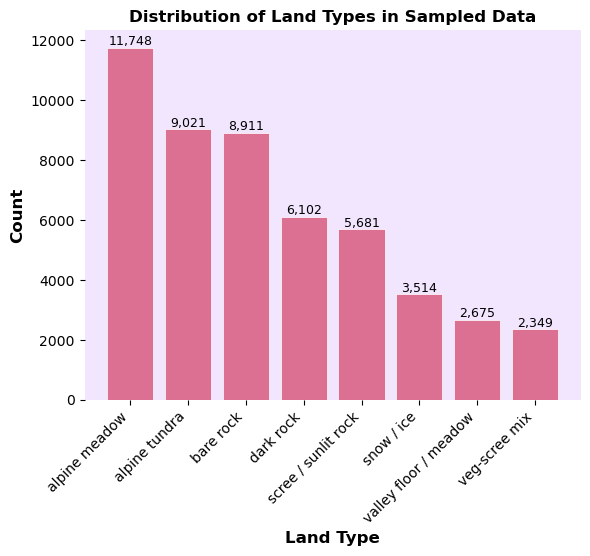

<Figure size 1000x800 with 0 Axes>

In [14]:
bars = plt.bar(df_sample['land_type'].unique(), df_sample_land_type, color='palevioletred', edgecolor='white', linewidth=0.5) 

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}',
             ha='center', va='bottom', fontsize=9)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(False)
plt.gca().spines['bottom'].set_linewidth(False)
plt.gca().set_facecolor('#f2e6ff')
plt.title('Distribution of Land Types in Sampled Data', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Land Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')


plt.figure(figsize=(10,8))
plt.show()

In [15]:
perc_real = (df['land_type'].value_counts() / len(df)) * 100
perc_sample = (df_sample['land_type'].value_counts() / len(df_sample)) * 100

pd.DataFrame({
    'Real Data Percentage': perc_real,
    'Sampled Data Percentage': perc_sample
})

,Real Data Percentage,Sampled Data Percentage
land_type,,
alpine meadow,23.495390,23.495530
alpine tundra,18.042337,18.041639
valley floor / meadow,17.821562,17.821644
bare rock,12.204783,12.203756
veg-scree mix,11.361106,11.361773
scree / sunlit rock,7.028163,7.027859
snow / ice,5.349159,5.349893
dark rock,4.697501,4.697906


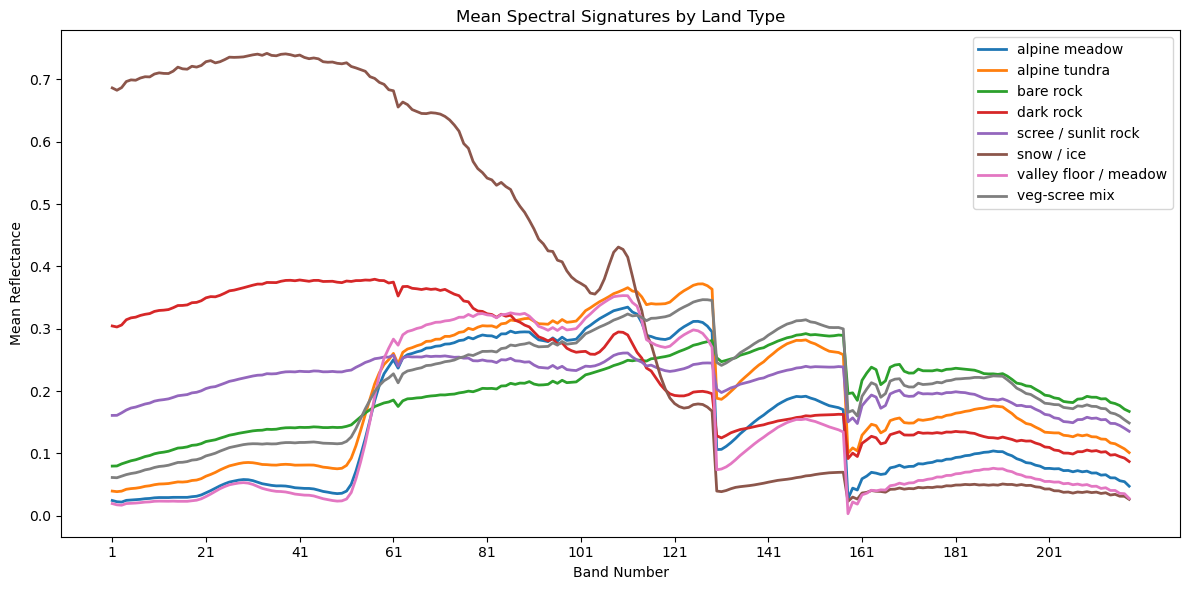

In [16]:
# Get the band columns
band_columns = [f'Band_{i}' for i in range(1, 219)]

# Create the plot
plt.figure(figsize=(12, 6))

# For each land type, calculate and plot the mean reflectance
for land_type in df_sample['land_type'].unique():
    # Get rows for this land type
    land_data = df_sample[df_sample['land_type'] == land_type]
    
    # Calculate mean reflectance for each band
    mean_reflectance = land_data[band_columns].mean()
    
    # Plot it
    plt.plot(mean_reflectance, label=land_type, linewidth=2)

# Add labels and legend
plt.xticks(ticks=np.arange(0, 219, 20), labels=np.arange(1, 218, 20))
plt.xlabel('Band Number')
plt.ylabel('Mean Reflectance')
plt.title('Mean Spectral Signatures by Land Type')
plt.legend()
plt.tight_layout()
plt.show()

This line plot shows us the mean reflectance of each land type. (eg. ice is way more reflective)

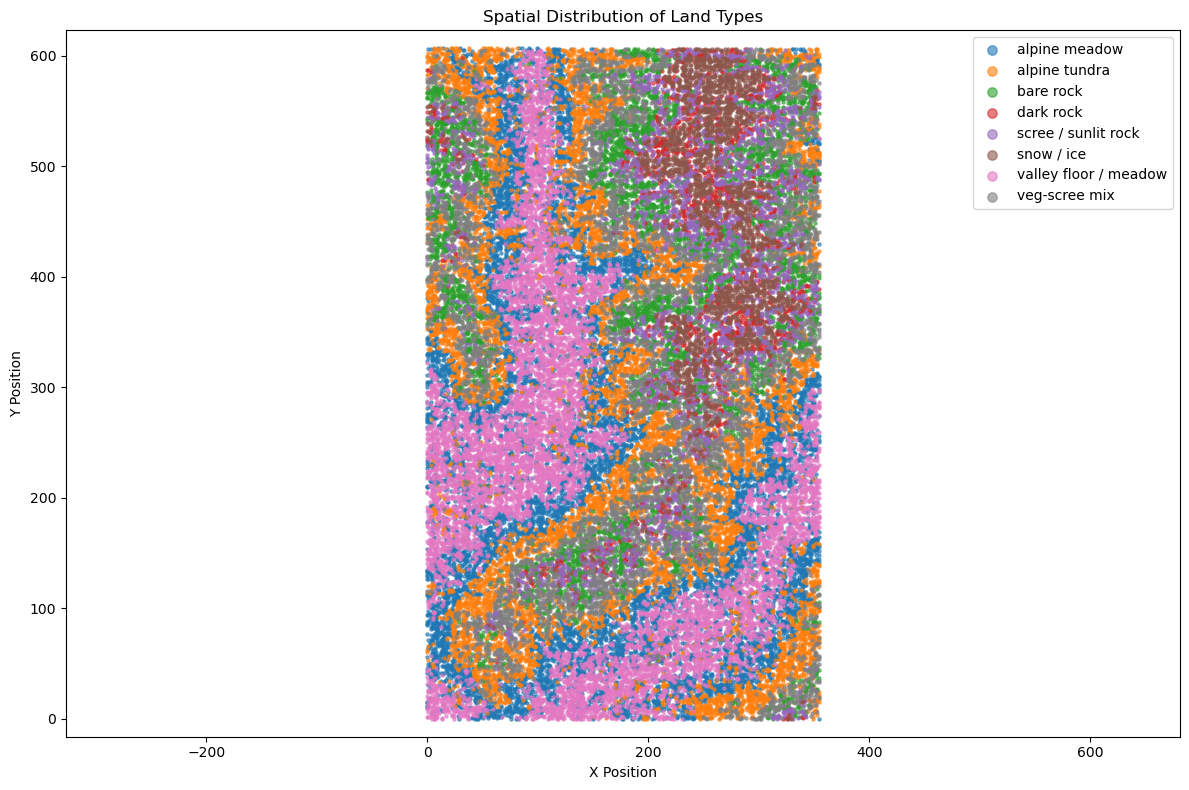

In [17]:
plt.figure(figsize=(12, 8))

# Plot each land type with different color
for land_type in df_sample['land_type'].unique():
    land_data = df_sample[df_sample['land_type'] == land_type]
    plt.scatter(land_data['p_x'], land_data['p_y'], 
                label=land_type, alpha=0.6, s=5)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Spatial Distribution of Land Types')
plt.legend(markerscale=3)
plt.axis('equal')  # Makes x and y scales the same
plt.tight_layout()
plt.show()